Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
Starbucks

Dunkin’ Donuts

Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table in the HTML
table = soup.find('table')

# Convert the HTML table to a DataFrame
df = pd.read_html(str(table))[0]


                   State  Starbucks Stores 2023  Starbucks Stores 2021  Starbucks Stores 2024
0             California                   3080                 2959.0                 3117.0
1                  Texas                   1346                 1215.0                 1409.0
2                Florida                    844                  786.0                  892.0
3             Washington                    741                  739.0                  736.0
4               New York                    692                  643.0                  715.0
5               Illinois                    677                  621.0                  685.0
6                Arizona                    548                  535.0                  579.0
7               Colorado                    495                  497.0                  506.0
8                   Ohio                    491                  446.0                  499.0
9               Virginia                    489             

<positron-console-cell-1>:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.


<p> Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee. <p>

In [2]:
# Function to parse and tidy the data for a given URL and brand
def parse_brand_data(url, brand):
    df = pd.read_html(url)[0]
    df = df.melt(id_vars=["State"], var_name="Year", value_name="Store_Count")
    df["Brand"] = brand
    return df

## URLS
starbucks_data = parse_brand_data("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state", "Starbucks")
dunkin_data = parse_brand_data("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state", "Dunkin' Donuts")

# Merge the datasets
coffee = pd.concat([starbucks_data, dunkin_data], ignore_index=True)

# ChatGPT helped with above function and this regular expression 
coffee['Year'] = coffee['Year'].str.extract(r'(\d{4})').astype(int)

print(coffee)

            State  Year  Store_Count           Brand
0      California  2023       3080.0       Starbucks
1           Texas  2023       1346.0       Starbucks
2         Florida  2023        844.0       Starbucks
3      Washington  2023        741.0       Starbucks
4        New York  2023        692.0       Starbucks
..            ...   ...          ...             ...
250       Montana  2023          0.0  Dunkin' Donuts
251  North Dakota  2023          0.0  Dunkin' Donuts
252        Oregon  2023          0.0  Dunkin' Donuts
253  South Dakota  2023          0.0  Dunkin' Donuts
254    Washington  2023         19.0  Dunkin' Donuts

[255 rows x 4 columns]
            State  Year  Store_Count           Brand
0      California  2023       3080.0       Starbucks
1           Texas  2023       1346.0       Starbucks
2         Florida  2023        844.0       Starbucks
3      Washington  2023        741.0       Starbucks
4        New York  2023        692.0       Starbucks
..            ...   ..

<p> Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information. <p>



In [3]:


# Scraping the Wikipedia page for state populations
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
population_data = pd.read_html(url, header=0)[0]

population_data = population_data[['State', 'Census population, April 1, 2020 [1][2]']]

# Rename columns 
population_data.columns = ['State', 'Population']

# Clean and convert (chatGPT helped with cleaning the commas)
population_data['Population'] = (
    population_data['Population']
    .astype(str)  # Convert all values to string
    .str.replace(',', '')  # Remove commas
    .replace('nan', '')  # Replace 'nan' strings with an empty string, if needed
)
population_data['Population'] = population_data['Population'].apply(lambda x: int(x) if x.isdigit() else None)

# Merging with the coffee dataset
coffee_pop = coffee.merge(population_data, on="State", how="left")

print(coffee_pop)





            State  Year  Store_Count           Brand  Population
0      California  2023       3080.0       Starbucks    39538223
1           Texas  2023       1346.0       Starbucks    30145505
2         Florida  2023        844.0       Starbucks    21538187
3      Washington  2023        741.0       Starbucks     7705281
4        New York  2023        692.0       Starbucks    20201249
..            ...   ...          ...             ...         ...
250       Montana  2023          0.0  Dunkin' Donuts     1084225
251  North Dakota  2023          0.0  Dunkin' Donuts      779094
252        Oregon  2023          0.0  Dunkin' Donuts     4237256
253  South Dakota  2023          0.0  Dunkin' Donuts      886667
254    Washington  2023         19.0  Dunkin' Donuts     7705281

[255 rows x 5 columns]
            State  Year  Store_Count           Brand  Population
0      California  2023       3080.0       Starbucks    39538223
1           Texas  2023       1346.0       Starbucks    30145505
2

In [4]:

data = {
    'Brand': ['Starbucks', 'Starbucks', 'Starbucks', "Dunkin' Donuts", "Dunkin' Donuts", "Dunkin' Donuts"],
    'Year': [2021, 2023, 2024, 2021, 2023, 2024],
    'Stock Price': [114.16, 103.77, 81.24, 106.4, 100.1, 110.2]
}

# Creating the DataFrame
stock_data = pd.DataFrame(data)

# Merging the DataFrames on 'Brand' and 'Year'
coffee_pop= pd.merge(coffee_pop, stock_data, on=['Brand', 'Year'], how='left')

# Display the merged DataFrame
print(coffee_pop)

            State  Year  Store_Count           Brand  Population  Stock Price
0      California  2023       3080.0       Starbucks    39538223       103.77
1           Texas  2023       1346.0       Starbucks    30145505       103.77
2         Florida  2023        844.0       Starbucks    21538187       103.77
3      Washington  2023        741.0       Starbucks     7705281       103.77
4        New York  2023        692.0       Starbucks    20201249       103.77
..            ...   ...          ...             ...         ...          ...
250       Montana  2023          0.0  Dunkin' Donuts     1084225       100.10
251  North Dakota  2023          0.0  Dunkin' Donuts      779094       100.10
252        Oregon  2023          0.0  Dunkin' Donuts     4237256       100.10
253  South Dakota  2023          0.0  Dunkin' Donuts      886667       100.10
254    Washington  2023         19.0  Dunkin' Donuts     7705281       100.10

[255 rows x 6 columns]
            State  Year  Store_Count    

In [5]:

# Define regions and divisions as dictionaries
regions = {
    'Northeast': {
        'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
        'Middle Atlantic': ['New Jersey', 'New York', 'Pennsylvania']
    },
    'Midwest': {
        'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
        'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    },
    'South': {
        'South Atlantic': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Washington, D.C.', 'West Virginia'],
        'East South Central': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'],
        'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    },
    'West': {
        'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming'],
        'Pacific': ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    }
}

# Function to determine region and division based on state
def categorize_region(state):
    for region, divisions in regions.items():
        for division, states in divisions.items():
            if state in states:
                return pd.Series([region, division])
    return pd.Series([None, None])  # Return None if no match is found

# Apply the function and add results as new columns
coffee_pop[['Region', 'Division']] = coffee_pop['State'].apply(categorize_region)

# Display the DataFrame with added region and division columns
print(coffee_pop)


            State  Year  Store_Count  ... Stock Price     Region            Division
0      California  2023       3080.0  ...      103.77       West             Pacific
1           Texas  2023       1346.0  ...      103.77      South  West South Central
2         Florida  2023        844.0  ...      103.77      South      South Atlantic
3      Washington  2023        741.0  ...      103.77       West             Pacific
4        New York  2023        692.0  ...      103.77  Northeast     Middle Atlantic
..            ...   ...          ...  ...         ...        ...                 ...
250       Montana  2023          0.0  ...      100.10       West            Mountain
251  North Dakota  2023          0.0  ...      100.10    Midwest  West North Central
252        Oregon  2023          0.0  ...      100.10       West             Pacific
253  South Dakota  2023          0.0  ...      100.10    Midwest  West North Central
254    Washington  2023         19.0  ...      100.10       West 

### Analyze

##### Are some of these chains more prevalent in certain regions than others?

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 45 rows containing missing values.


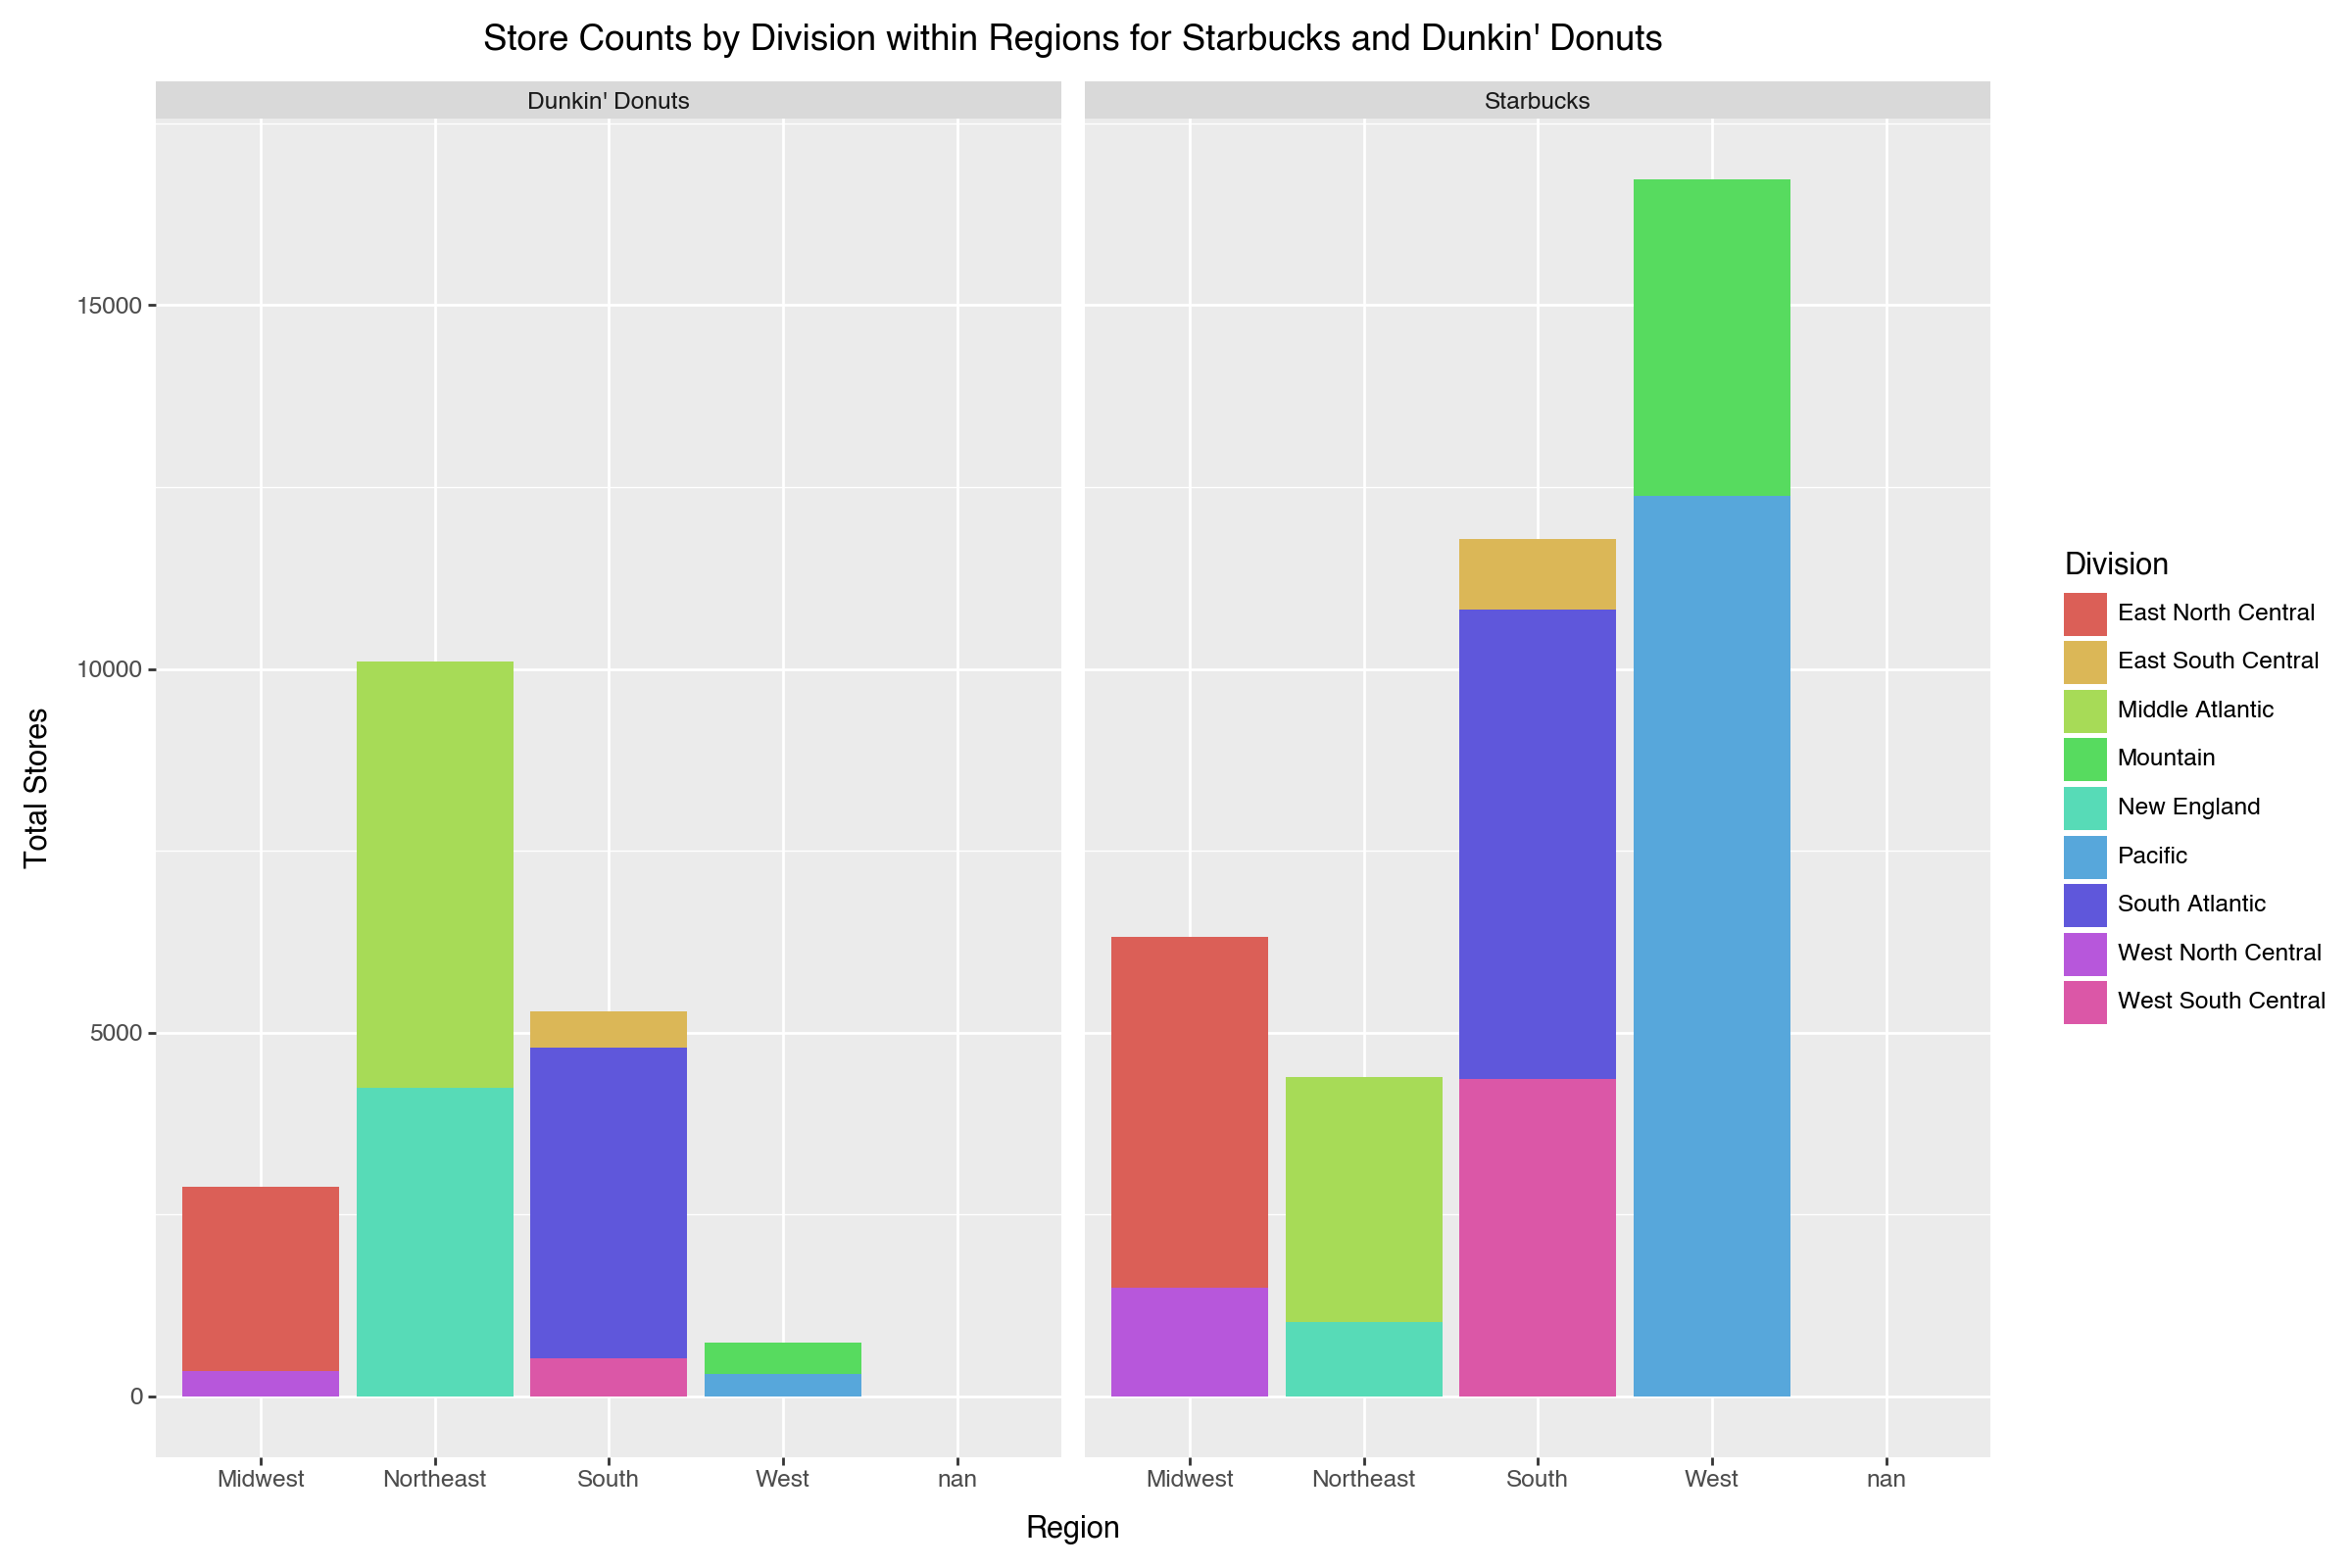

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 45 rows containing missing values.


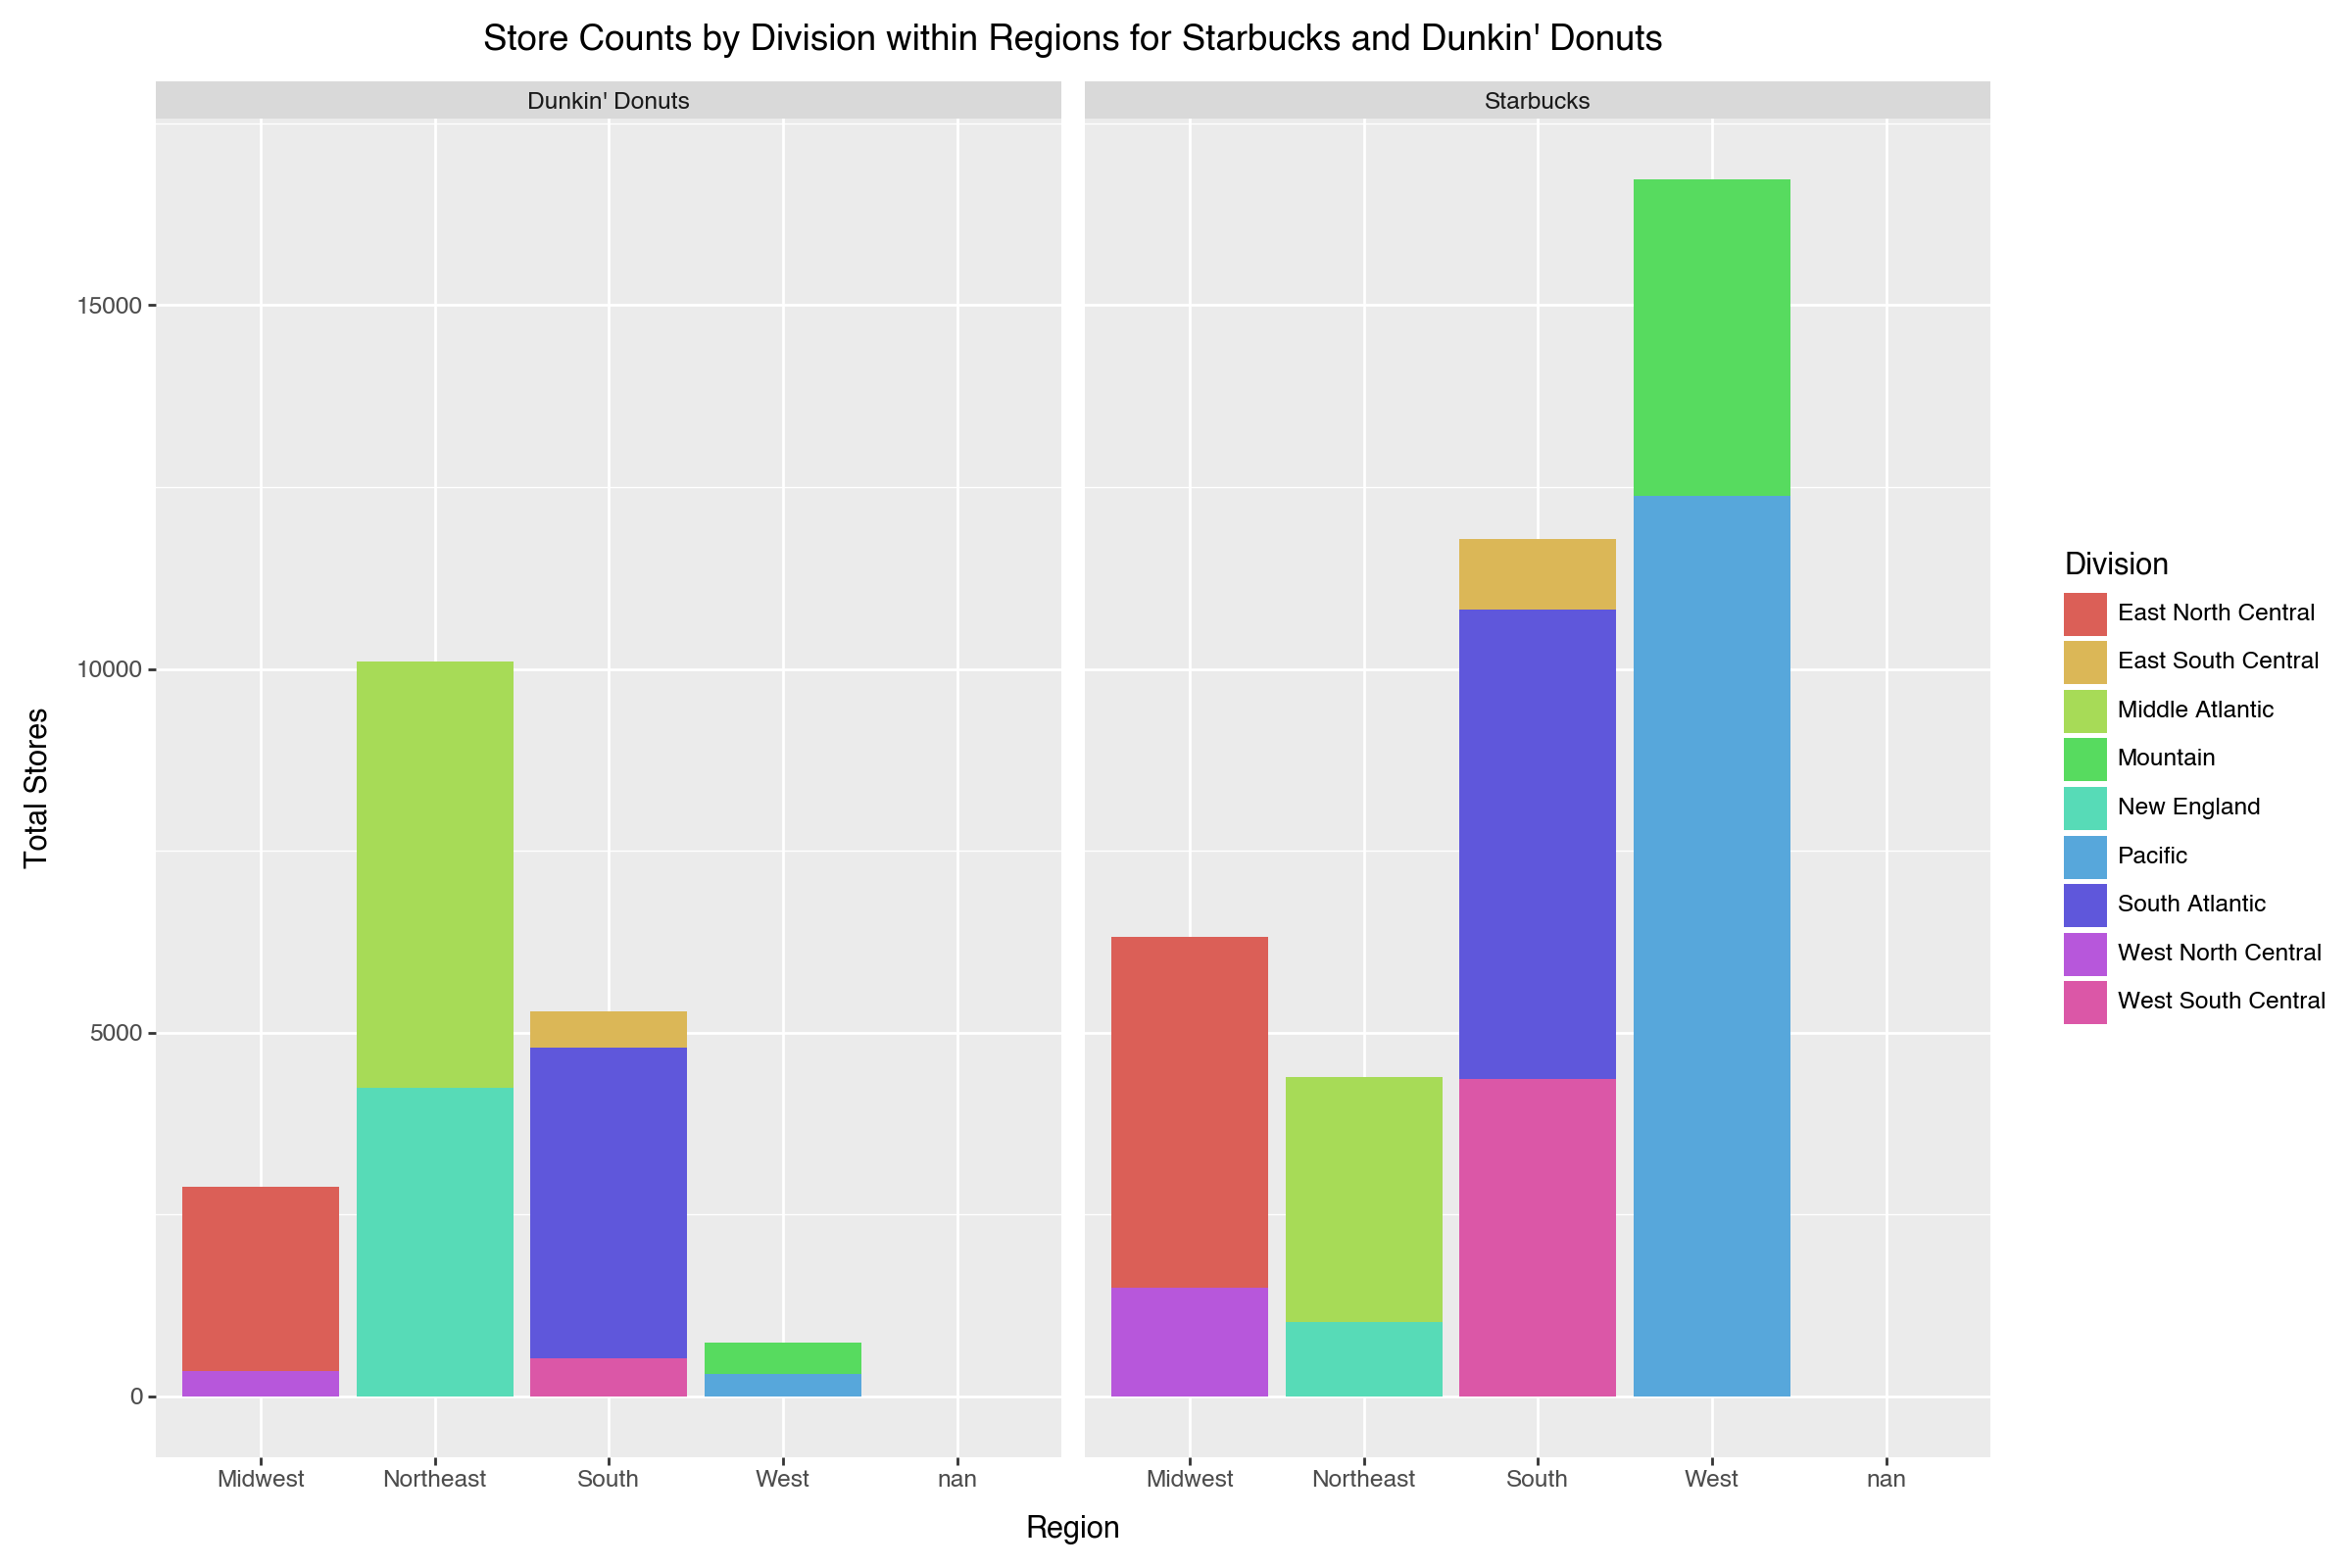

In [9]:
from plotnine import ggplot, aes, geom_bar, labs, theme, facet_wrap, geom_col, facet_wrap, coord_flip



plot = (
    ggplot(coffee_pop, aes(x='Region', y='Store_Count', fill='Division')) +
    geom_bar(stat='identity', position='stack') +
    labs(title='Store Counts by Division within Regions for Starbucks and Dunkin\' Donuts',
         x='Region', y='Total Stores') +
    facet_wrap('~Brand') +
    theme(figure_size=(12, 8))
)

plot

<p> There are two regions that are distinctly dominated by one store. The West, most notably the pacifc is populated by almost entirely Starbucks Stores. While on the otherhand the Northeast has mostly Dunkin stores. Also, the South has simmilar amounts of dunkin to starbucks aside from the West South Central that has mostly Starbucks. <p>

#### Stores per-capita


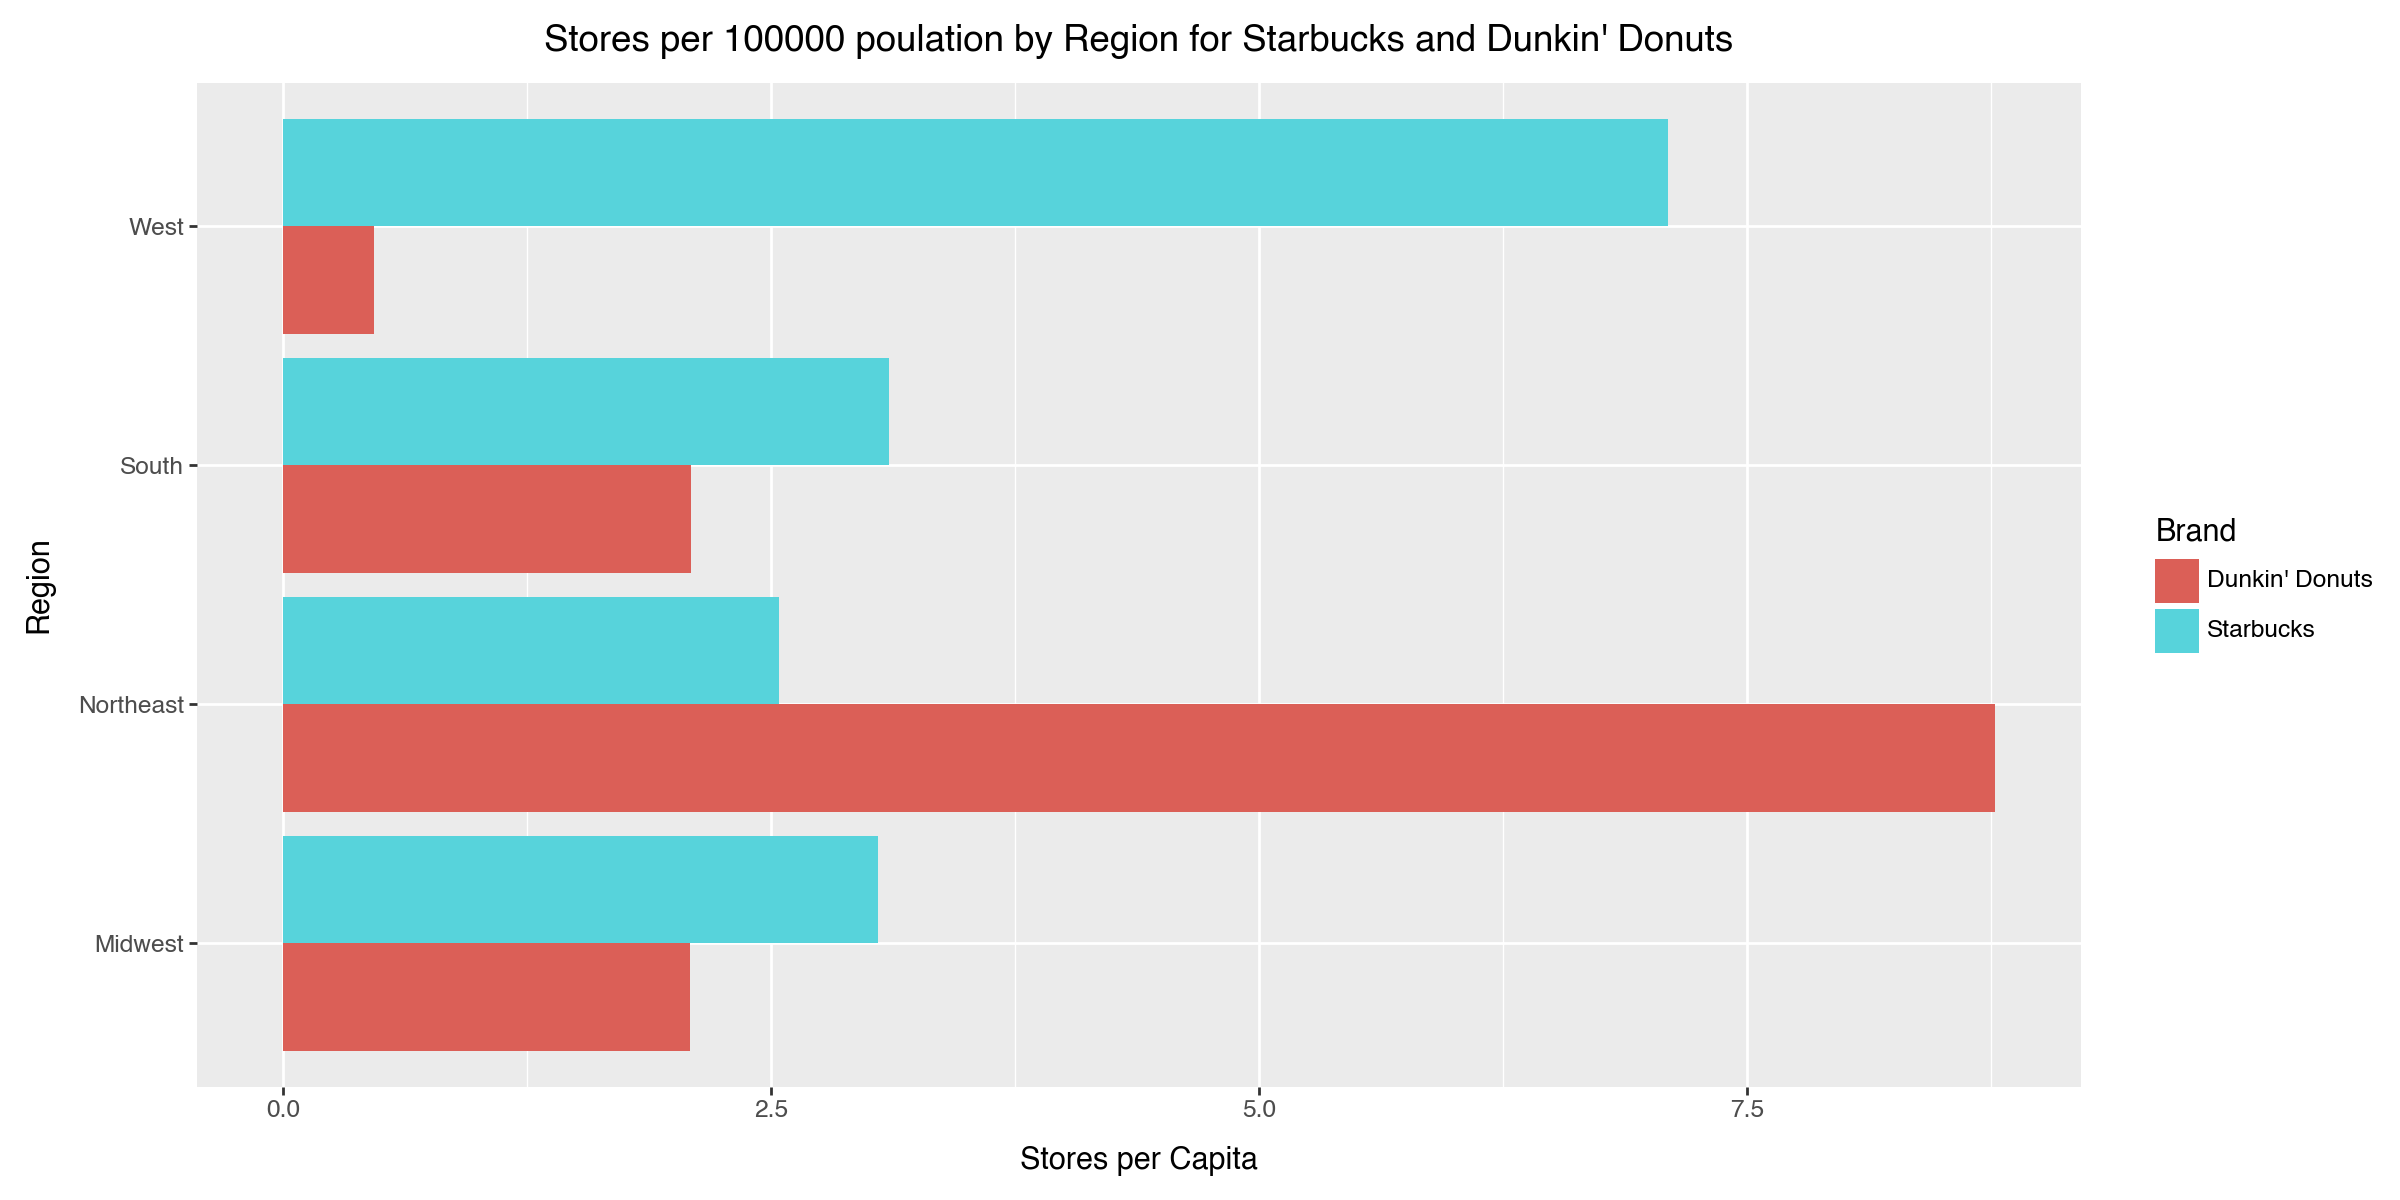

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


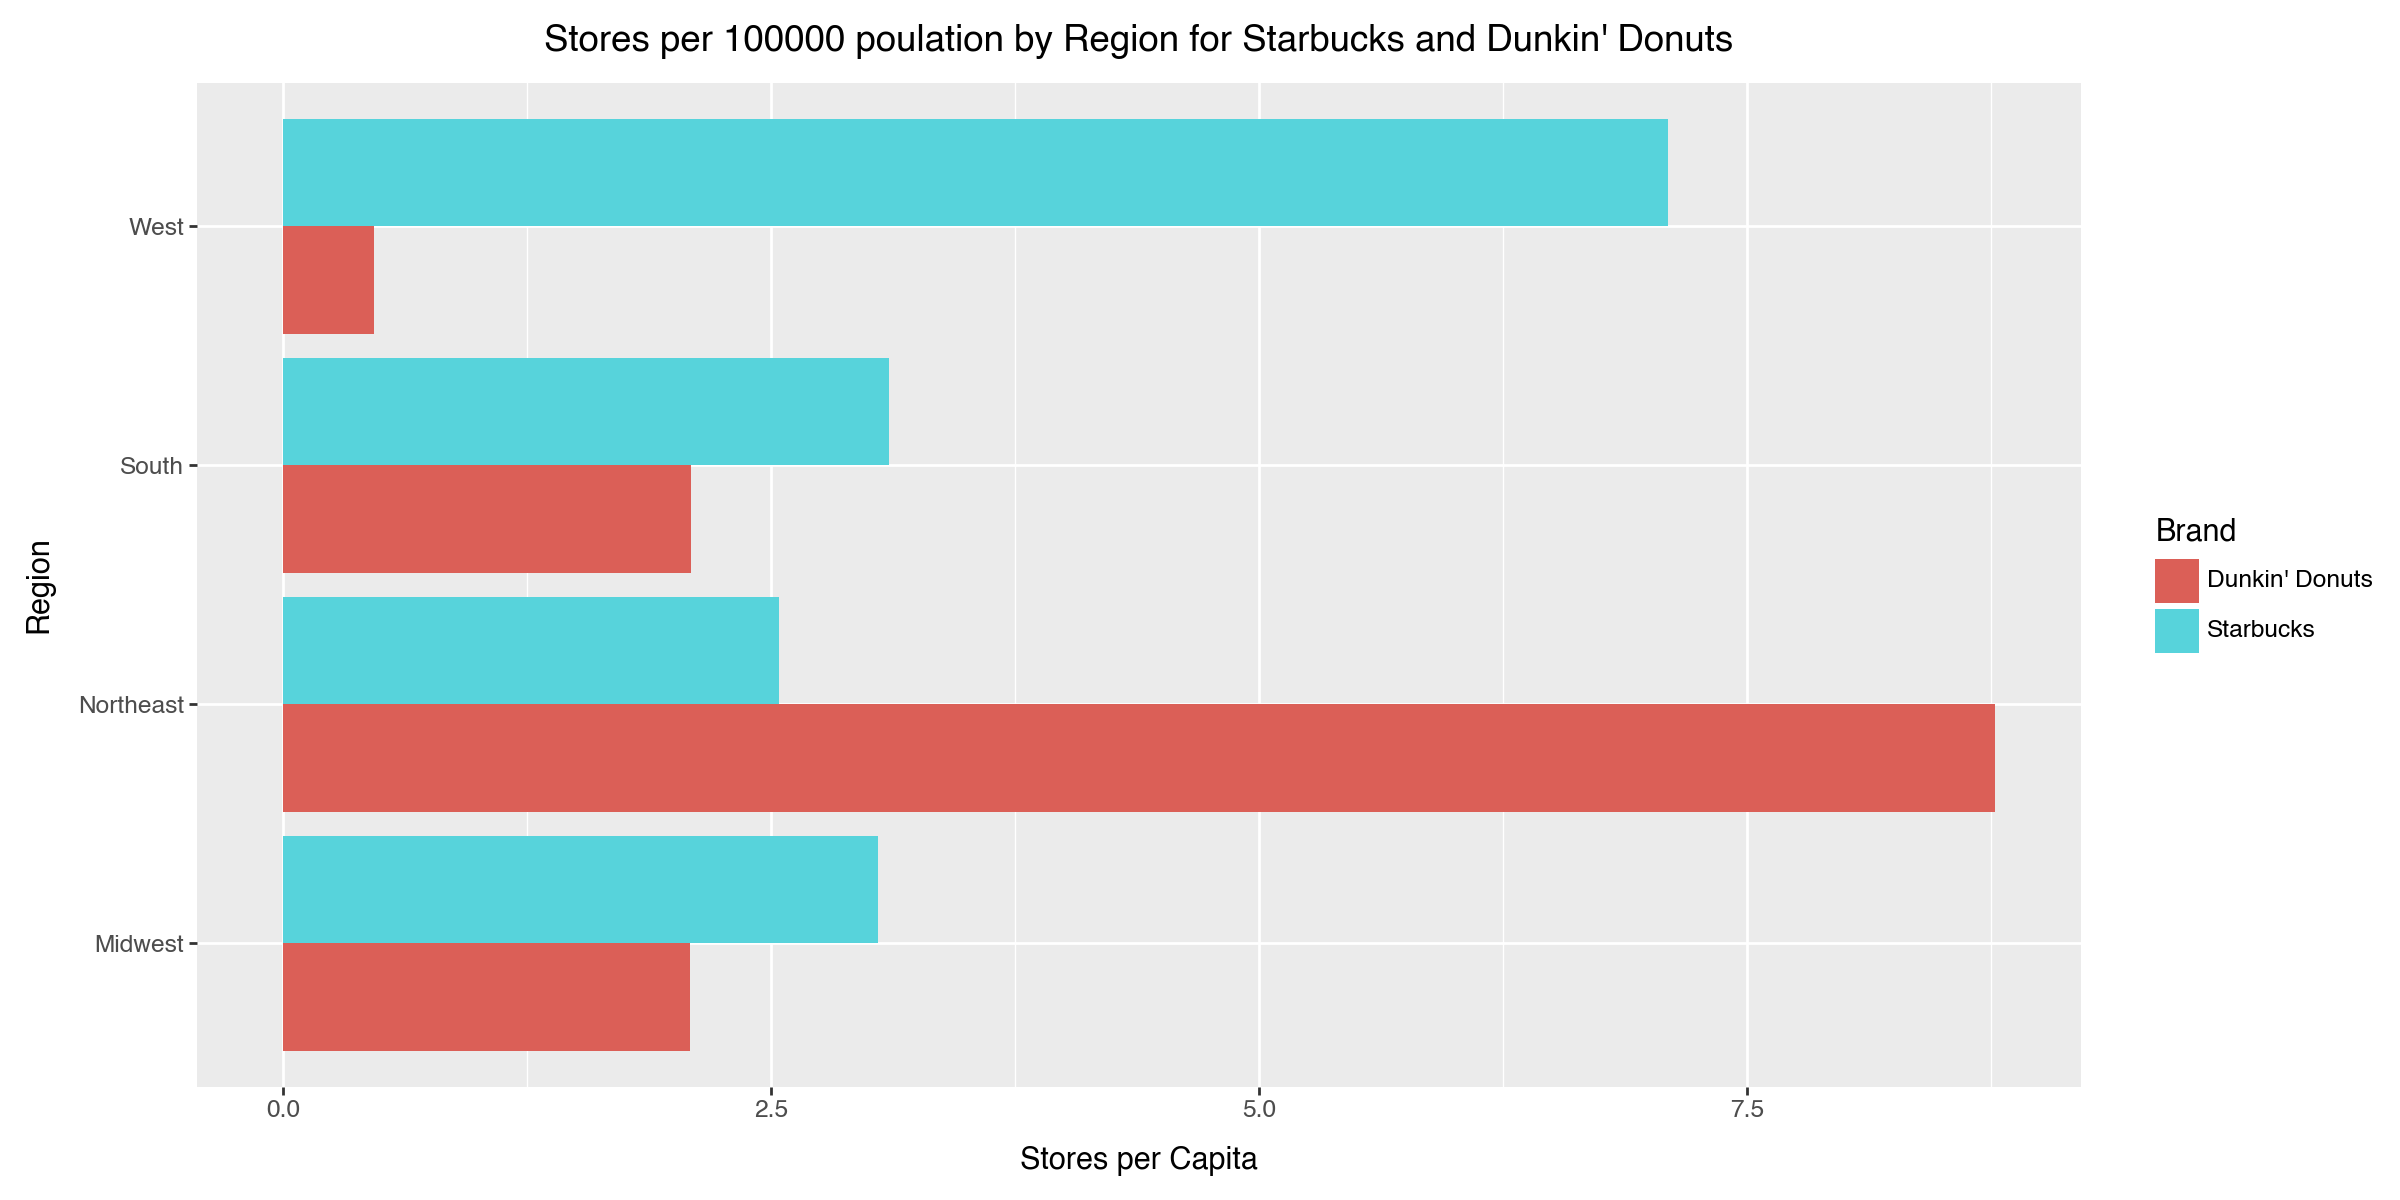

In [14]:

from plotnine import ggplot, aes, 
# Calculating stores per capita
coffee_pop['Stores_Per_Capita'] = coffee_pop['Store_Count'] / coffee_pop['Population']



# Summing total stores and population by region for regional comparison
region_summary = coffee_pop.groupby(['Region', 'Brand']).agg(
    Total_Stores=('Store_Count', 'sum'),
    Total_Population=('Population', 'sum')
).reset_index()

# Calculate regional stores per capita
region_summary['Stores_Per_Capita'] = region_summary['Total_Stores'] / region_summary['Total_Population']*100000

# Plot: Stores per capita by region for each brand
plot = (
    ggplot(region_summary, aes(x='Region', y='Stores_Per_Capita', fill='Brand')) +
    geom_col(position='dodge') +
    labs(title='Stores per 100000 poulation by Region for Starbucks and Dunkin\' Donuts',
         x='Region', y='Stores per Capita') +
    coord_flip() + 
    theme(figure_size=(12, 6))
)

plot

<p> From a per-capita perspective there seems to be serious saturation in the Northeast region for Dunkin Donuts and in the west for Starbucks. These are where most of their repsective stores are located as seen in the previous graph. It is also where both companies first stores were located. So perhaps they are most popular close to thier original location and have yet to cross into eachothers in a significant fashion. <p>

#### Stock Price Over Time


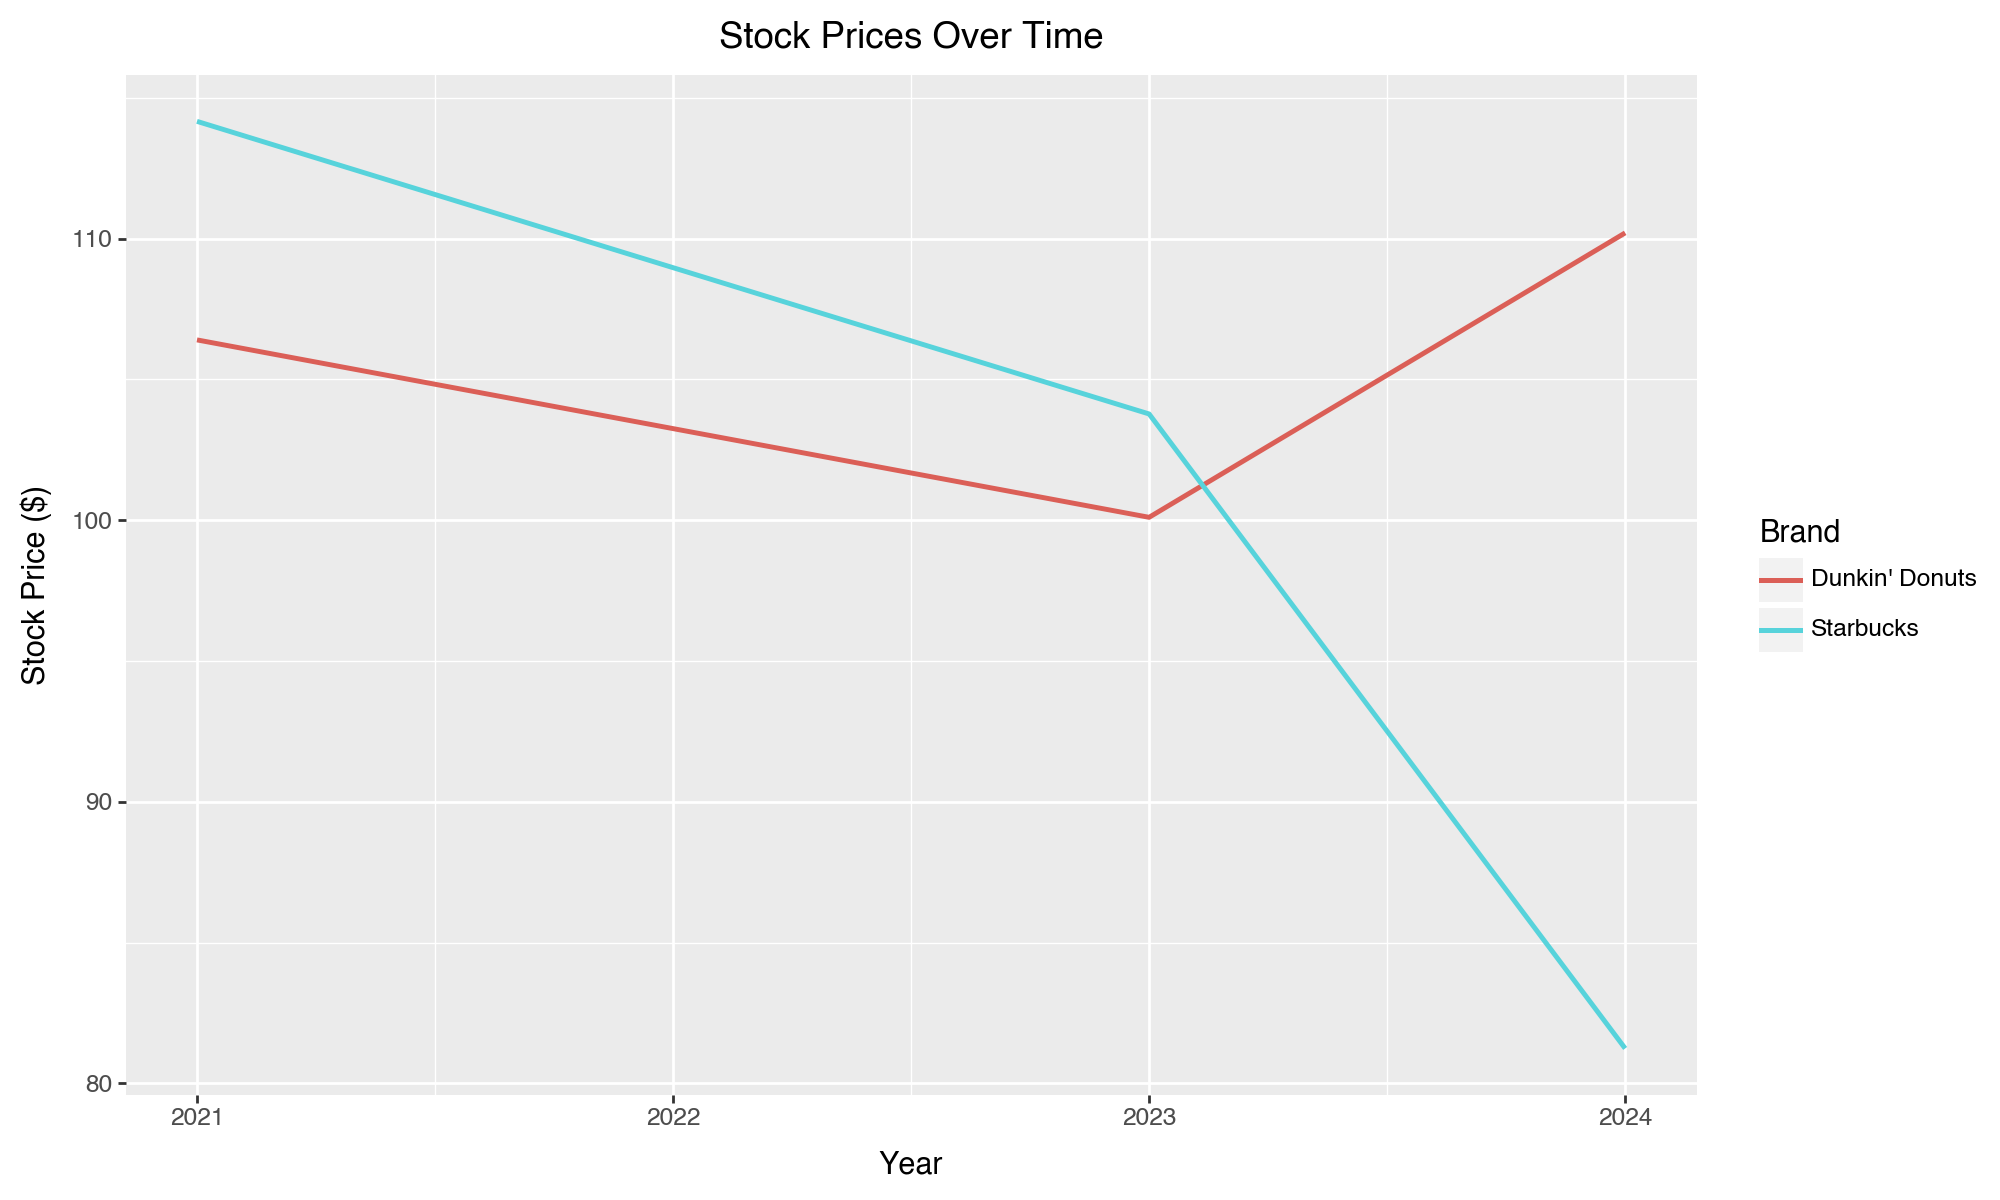

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


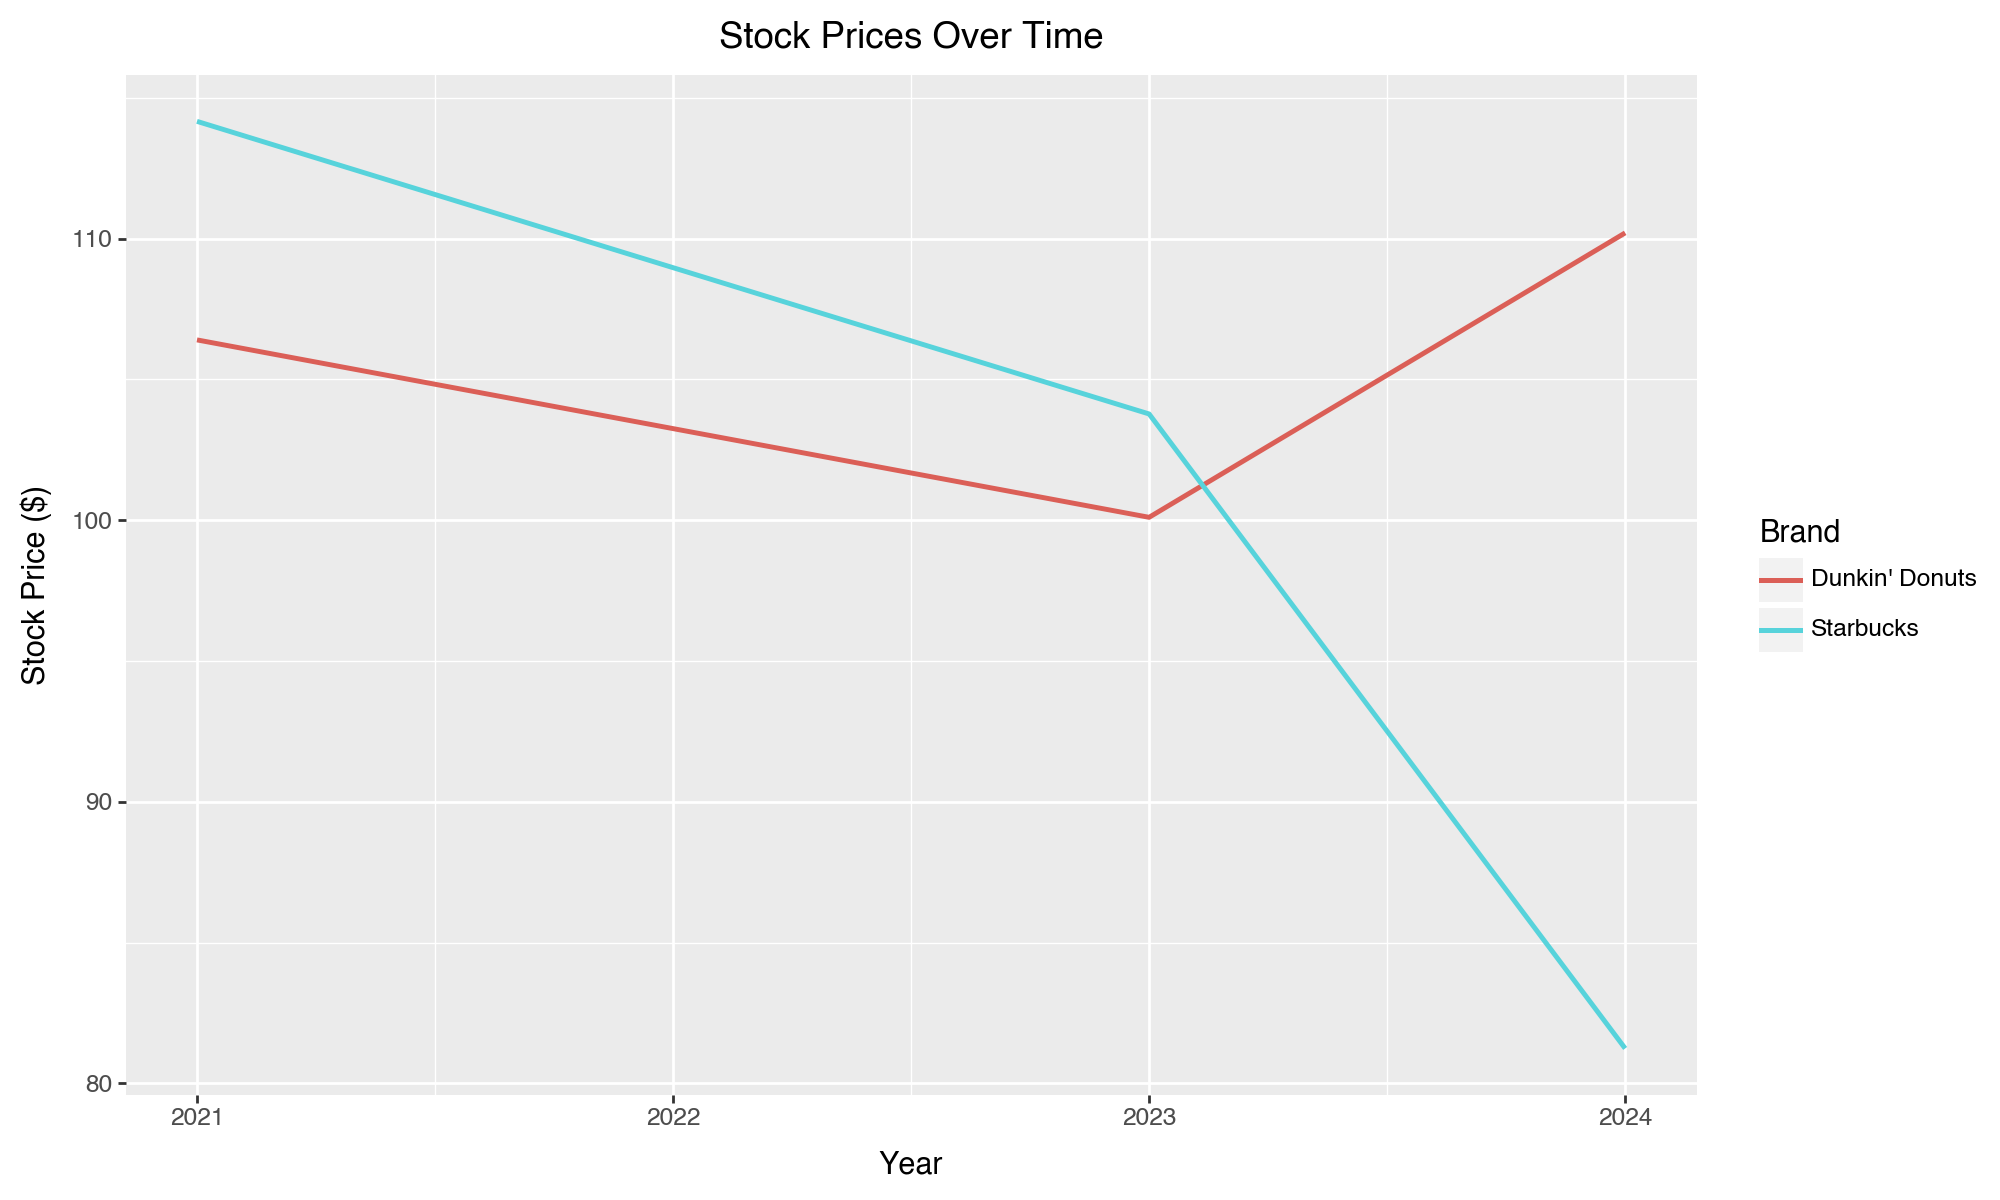

In [24]:
from plotnine import geom_line
plot = (
    ggplot(stock_data, aes(x='Year', y='Stock Price', color='Brand')) +
    geom_line(size=1) +
    labs(title='Stock Prices Over Time',
         x='Year',
         y='Stock Price ($)') +
    theme(figure_size=(10, 6))
)

plot

<p> Interestingly it seems that Starbucks is on a slight downward trend. This went against my intuiton as Starbucks seems ever-present in the west. Although it does make sense to see Dunkin trending upwards as I have seen more and more of them here on the west coast, their smallest region. <p>

###### Would like to note that I had ChatGPT help me create the 1st graphic by setting the correct aes and with calculating the per capita on the second graph.